In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
import os
warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cyber-security-attacks/README.md
/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv


In [4]:
df = pd.read_csv("/kaggle/input/cyber-security-attacks/cybersecurity_attacks.csv")
df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


In [5]:
df.shape

(40000, 25)

In [6]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

In [7]:
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
# Replace NaN values with 'No Detection' in 'Malware Indicators'
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)

In [10]:
# Replace 'Alert Triggered' with 'yes' and any other value with 'no' in 'Alerts/Warnings'
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 'yes' if x == 'Alert Triggered' else 'no')

In [11]:
# Replace NaN values with 'No proxy' in 'Proxy Information'
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)

In [12]:
# Replace NaN values with 'No Data' in 'Firewall Logs'
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'No Data' if pd.isna(x) else x)

In [13]:
# Replace NaN values with 'No Data' in 'IDS/IPS Alerts'
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'No Data' if pd.isna(x) else x)

In [14]:
# Ensure Ports are within valid range
df['Source Port'] = df['Source Port'].apply(lambda x: x if 0 <= x <= 65535 else 'Invalid Port')
df['Destination Port'] = df['Destination Port'].apply(lambda x: x if 0 <= x <= 65535 else 'Invalid Port')

In [15]:
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [16]:
df['Device Information'].value_counts()

Device Information
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)                                                                                       35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)                                                                                           34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)                                                                                           33
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)                                                                                       31
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)                                                                                       31
                                                                                                                                                      ..
Mozilla/5.0 (Macintosh; PPC Mac OS X 10_9_2; rv:1.9.2.20) Gecko

In [17]:
# Extract 'Device'
df['Browser'] = df['Device Information'].str.split('/').str[0]

In [18]:
df['Browser'].unique()

array(['Mozilla', 'Opera'], dtype=object)

In [20]:
# OS and device patterns to search for
# Return 'Unknown' if no patterns match
# re.I makes the search case-insensitive
patterns = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh',
]

def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I)  
        if match:
            return match.group()
    return 'Unknown' 

In [21]:
# Extract device or OS
df['Device/OS'] = df['Device Information'].apply(extract_device_or_os)

In [22]:
df = df.drop('Device Information', axis = 1)

In [23]:
# Group by 'Device/OS' and count the number of attacks
device_counts = df['Device/OS'].value_counts()

# Convert the result to a DataFrame for better readability
device_counts_df = pd.DataFrame(device_counts).reset_index()
device_counts_df.columns = ['Device/OS', 'Count of Attacks']

# Display the top 10 devices/OS by number of attacks
top_devices = device_counts_df.head(10)
print(top_devices)

   Device/OS  Count of Attacks
0    Windows             17953
1      Linux              8840
2  Macintosh              5813
3       iPod              2656
4    Android              1620
5     iPhone              1567
6       iPad              1551


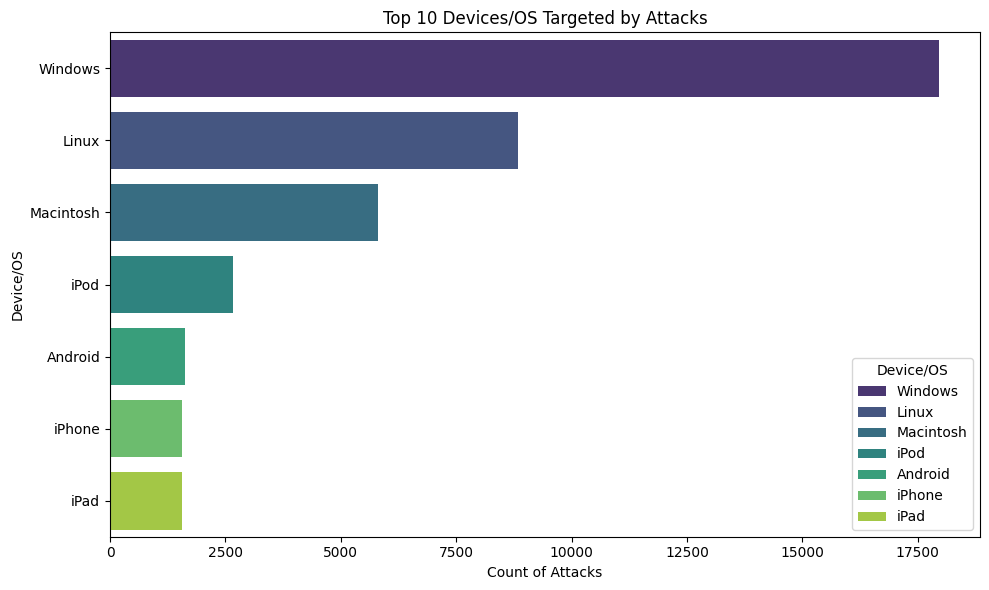

In [24]:
# Plotting the top devices/OS 
plt.figure(figsize=(10, 6))
sns.barplot(x='Count of Attacks', y='Device/OS', hue='Device/OS', data=top_devices, palette='viridis', dodge=False)
plt.xlabel('Count of Attacks')
plt.ylabel('Device/OS')
plt.title('Top 10 Devices/OS Targeted by Attacks')
plt.tight_layout()
plt.show()

In [25]:
# Group by 'Attack Type' and count the number of occurrences
attack_type_counts = df['Attack Type'].value_counts()

# Convert the result to a DataFrame for better readability
attack_type_counts_df = pd.DataFrame(attack_type_counts).reset_index()
attack_type_counts_df.columns = ['Attack Type', 'Count of Attacks']

# Display the top 10 attack types by number of occurrences
top_attack_types = attack_type_counts_df.head(10)
print(top_attack_types)

  Attack Type  Count of Attacks
0        DDoS             13428
1     Malware             13307
2   Intrusion             13265


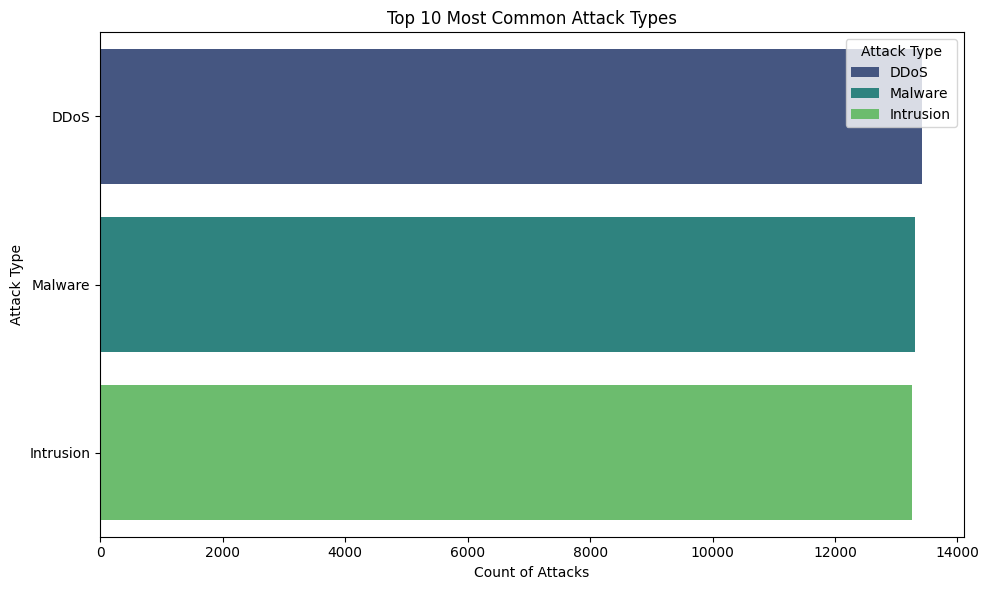

In [26]:
# Plotting the top attack types
plt.figure(figsize=(10, 6))
sns.barplot(x='Count of Attacks', y='Attack Type', hue='Attack Type', data=top_attack_types, palette='viridis', dodge=False)
plt.xlabel('Count of Attacks')
plt.ylabel('Attack Type')
plt.title('Top 10 Most Common Attack Types')
plt.tight_layout()
plt.show()

In [27]:
# Group by 'Geo-location Data' and count the number of occurrences
geo_location_counts = df['Geo-location Data'].value_counts()

# Convert the result to a DataFrame for better readability
geo_location_counts_df = pd.DataFrame(geo_location_counts).reset_index()
geo_location_counts_df.columns = ['Geo-location Data', 'Count of Attacks']

# Display the top 10 geographic locations by number of attacks
top_geo_locations = geo_location_counts_df.head(10)
print(top_geo_locations)

                Geo-location Data  Count of Attacks
0            Ghaziabad, Meghalaya                16
1      Kalyan-Dombivli, Jharkhand                15
2          Ghaziabad, Uttarakhand                14
3              Ghaziabad, Tripura                14
4              Kottayam, Nagaland                13
5         Srikakulam, Uttarakhand                13
6            Aurangabad, Nagaland                13
7  Yamunanagar, Arunachal Pradesh                13
8                Motihari, Odisha                13
9                  Amroha, Sikkim                13


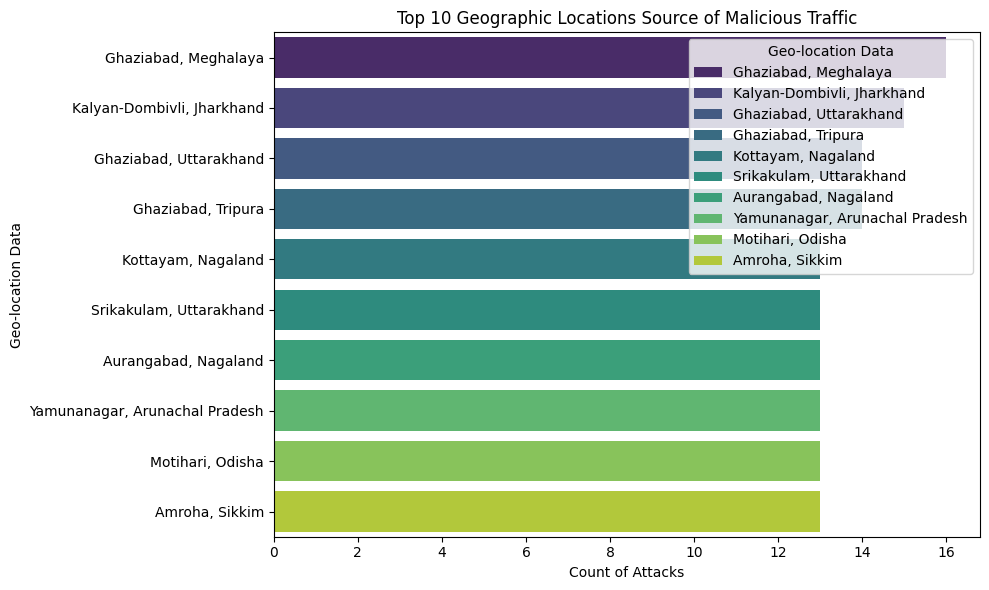

In [28]:
# Plotting the top geographic locations
plt.figure(figsize=(10, 6))
sns.barplot(x='Count of Attacks', y='Geo-location Data', hue='Geo-location Data', data=top_geo_locations, palette='viridis', dodge=False)
plt.xlabel('Count of Attacks')
plt.ylabel('Geo-location Data')
plt.title('Top 10 Geographic Locations Source of Malicious Traffic')
plt.tight_layout()
plt.show()

In [29]:
# Group by 'Destination Port' and count the number of occurrences
destination_port_counts = df['Destination Port'].value_counts()

# Convert the result to a DataFrame for better readability
destination_port_counts_df = pd.DataFrame(destination_port_counts).reset_index()
destination_port_counts_df.columns = ['Destination Port', 'Count of Attacks']

# Display the top 10 destination ports by number of attacks
top_destination_ports = destination_port_counts_df.head(10)
print(top_destination_ports)

   Destination Port  Count of Attacks
0             34117                 6
1              7508                 6
2             30804                 5
3             37248                 5
4             57508                 5
5             56672                 5
6             38787                 5
7             36756                 5
8             25889                 5
9             39887                 5


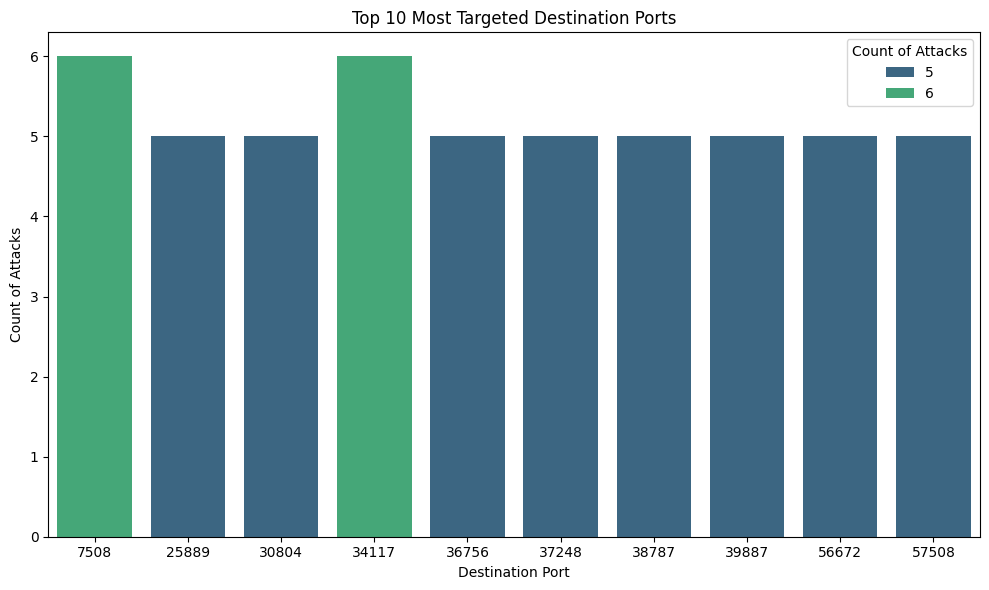

In [30]:
# Plotting the top destination ports
plt.figure(figsize=(10, 6))
sns.barplot(x='Destination Port', y='Count of Attacks', hue='Count of Attacks', data=top_destination_ports, palette='viridis', dodge=False)
plt.xlabel('Destination Port')
plt.ylabel('Count of Attacks')
plt.title('Top 10 Most Targeted Destination Ports')
plt.tight_layout()
plt.show()

In [31]:
# Mapping severity levels to numerical values
severity_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['Severity Level Numeric'] = df['Severity Level'].map(severity_mapping)

# Group by 'Protocol' and calculate the mean severity level
protocol_severity = df.groupby('Protocol')['Severity Level Numeric'].mean().reset_index()

# Sort the result by mean severity level in descending order
protocol_severity = protocol_severity.sort_values(by='Severity Level Numeric', ascending=False)

# Display the top 10 protocols by mean severity level
top_protocol_severity = protocol_severity.head(10)
print(top_protocol_severity)

  Protocol  Severity Level Numeric
2      UDP                2.012257
1      TCP                2.006480
0     ICMP                1.996277


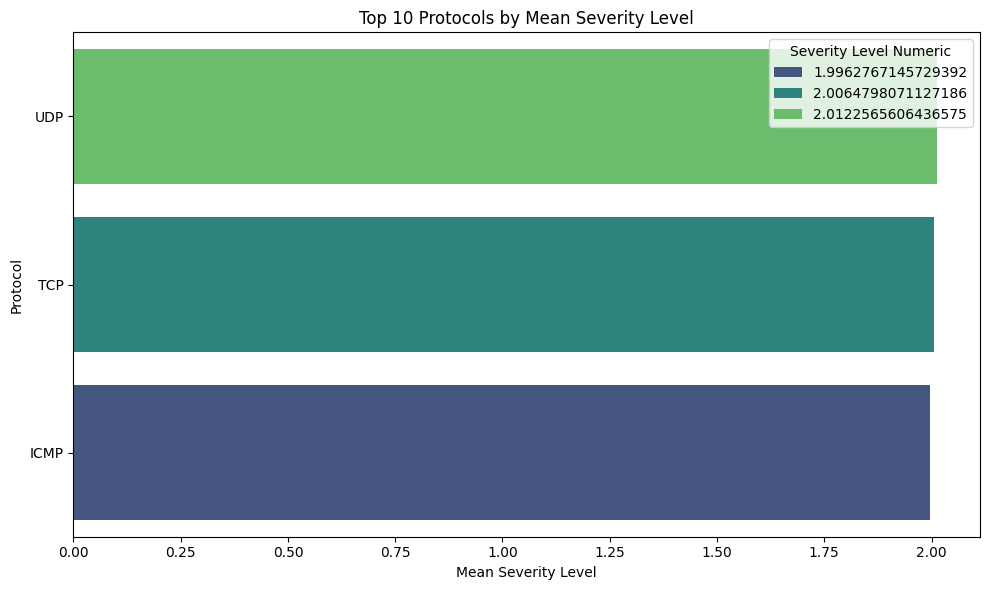

In [32]:
# Plotting the top protocols by mean severity level
plt.figure(figsize=(10, 6))
sns.barplot(x='Severity Level Numeric', y='Protocol', hue='Severity Level Numeric', data=top_protocol_severity, palette='viridis', dodge=False)
plt.xlabel('Mean Severity Level')
plt.ylabel('Protocol')
plt.title('Top 10 Protocols by Mean Severity Level')
plt.tight_layout()
plt.show()

In [33]:
# Group by 'Month' and count the number of occurrences
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['Month'] = df['Timestamp'].dt.month

month_counts = df['Month'].value_counts()

# Convert the result to a DataFrame for better readability
month_counts_df = pd.DataFrame(month_counts).reset_index()
month_counts_df.columns = ['Month', 'Count of Attacks']

# Display the months sorted by the number of attacks
sorted_month_counts = month_counts_df.sort_values(by='Month')
print(sorted_month_counts)

    Month  Count of Attacks
7       1              3378
8       2              3232
0       3              3678
6       4              3421
4       5              3595
3       6              3609
1       7              3623
2       8              3615
5       9              3482
9      10              2989
10     11              2703
11     12              2675


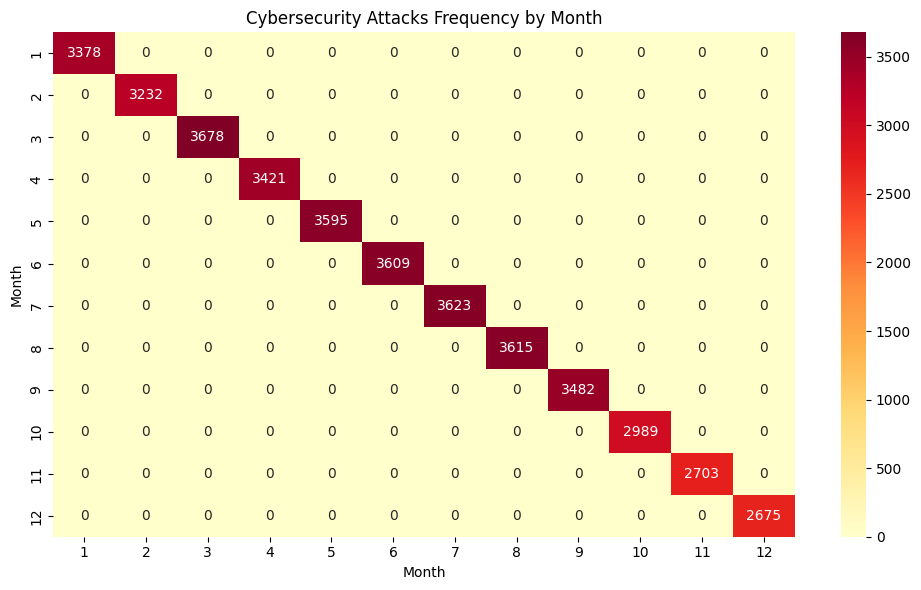

In [34]:
# Plotting the number of attacks per month
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month

# Count attacks by month
attacks_by_month = df.groupby('Month').size().reset_index(name='Attack Count')

# Plotting heatmap using pivot_table
heatmap_data = attacks_by_month.pivot_table(index='Month', columns='Month', values='Attack Count', aggfunc='sum', fill_value=0)

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlOrRd', cbar=True)
plt.title('Cybersecurity Attacks Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

In [35]:
# Filter rows where 'Malware Indicators' indicates malicious activity
malicious_traffic = df[df['Malware Indicators'] == 'IoC Detected']

# Group by 'Traffic Type' and count the number of occurrences
traffic_type_counts = malicious_traffic['Traffic Type'].value_counts()

# Convert the result to a DataFrame for better readability
traffic_type_counts_df = pd.DataFrame(traffic_type_counts).reset_index()
traffic_type_counts_df.columns = ['Traffic Type', 'Count of Malicious Incidents']

# Display the top 10 traffic types by number of malicious incidents
top_traffic_types = traffic_type_counts_df.head(10)
print(top_traffic_types)

  Traffic Type  Count of Malicious Incidents
0         HTTP                          6721
1          DNS                          6644
2          FTP                          6635


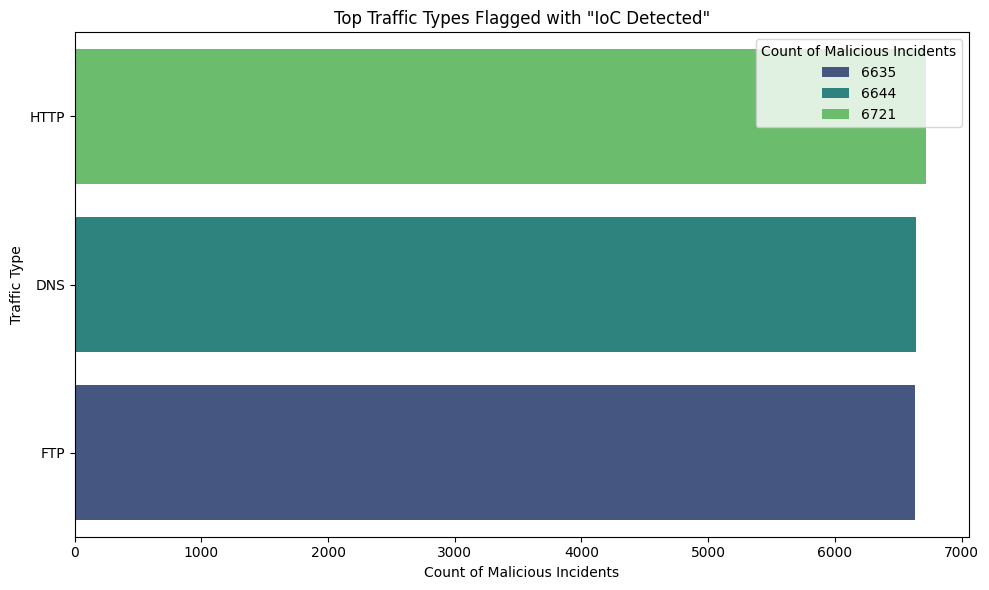

In [36]:
# Plotting the top traffic types flagged with "IoC Detected"
plt.figure(figsize=(10, 6))
sns.barplot(x='Count of Malicious Incidents', y='Traffic Type', hue='Count of Malicious Incidents', data=top_traffic_types, palette='viridis', dodge=False)
plt.xlabel('Count of Malicious Incidents')
plt.ylabel('Traffic Type')
plt.title('Top Traffic Types Flagged with "IoC Detected"')
plt.tight_layout()
plt.show()

In [37]:
# Calculate a threshold based on your data distribution
threshold = 75.0  # Example threshold, adjust as per your data analysis

# Filter data where 'Anomaly Scores' exceed the threshold
infiltration_data = df[df['Anomaly Scores'] > threshold]

# Group by 'Traffic Type' and count the number of occurrences
vulnerable_traffic_counts = infiltration_data['Traffic Type'].value_counts()

# Convert the result to a DataFrame for better readability
vulnerable_traffic_df = pd.DataFrame(vulnerable_traffic_counts).reset_index()
vulnerable_traffic_df.columns = ['Traffic Type', 'Count of Infiltrations']

# Display the top 10 vulnerable traffic types by number of infiltrations
top_vulnerable_traffic = vulnerable_traffic_df.head(10)
print(top_vulnerable_traffic)

  Traffic Type  Count of Infiltrations
0         HTTP                    3426
1          DNS                    3392
2          FTP                    3193


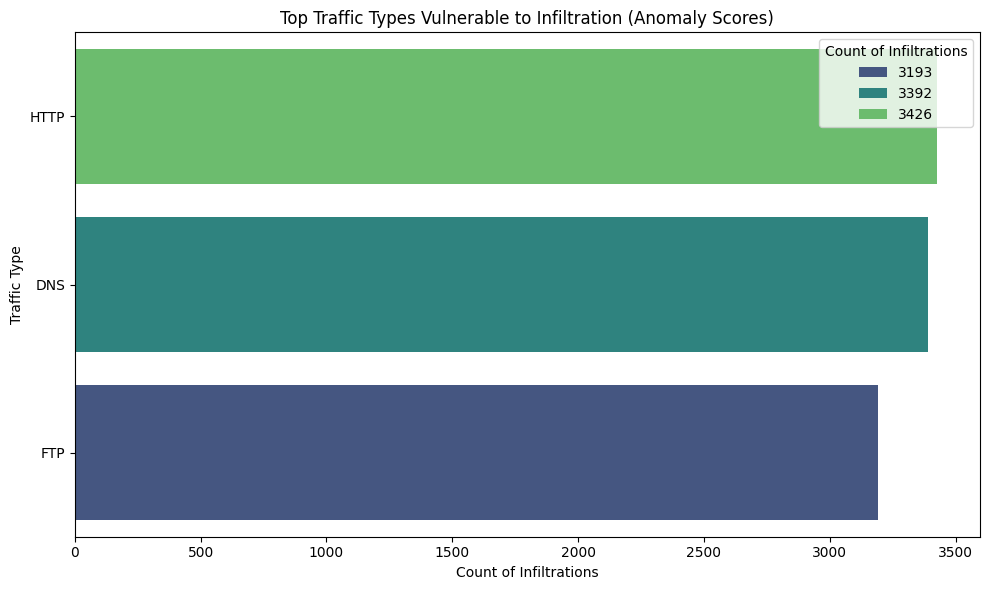

In [38]:
# Plotting the top traffic types vulnerable to infiltration
plt.figure(figsize=(10, 6))
sns.barplot(x='Count of Infiltrations', y='Traffic Type', hue='Count of Infiltrations', data=top_vulnerable_traffic, palette='viridis', dodge=False)
plt.xlabel('Count of Infiltrations')
plt.ylabel('Traffic Type')
plt.title('Top Traffic Types Vulnerable to Infiltration (Anomaly Scores)')
plt.tight_layout()
plt.show()

In [39]:
# Calculate the threshold as the 95th percentile of 'Anomaly Scores'
threshold = df['Anomaly Scores'].quantile(0.95)
print(f"Threshold for Anomaly Scores: {threshold}\n")

# Filter data where 'Anomaly Scores' exceed the threshold
infiltration_data = df[df['Anomaly Scores'] > threshold]

# Display the first few rows of filtered data to verify
print(infiltration_data.head())

Threshold for Anomaly Scores: 94.87

             Timestamp Source IP Address Destination IP Address  Source Port  \
23 2023-09-15 15:43:03      46.236.76.78         68.194.124.162        40832   
46 2023-05-16 13:01:56    170.211.138.30         172.97.181.148        25022   
76 2020-03-09 20:24:39    46.229.143.176        218.214.206.217        54052   
89 2022-11-20 04:12:04    130.204.139.35         165.165.89.101        27807   
94 2022-10-13 04:35:33    75.160.180.145        149.125.243.212        25179   

    Destination Port Protocol  Packet Length Packet Type Traffic Type  \
23             28015      UDP            118        Data         HTTP   
46              6593      TCP            554     Control          DNS   
76             10368     ICMP            686     Control          DNS   
89             53451      UDP            985     Control         HTTP   
94             13739     ICMP           1070     Control         HTTP   

                                         Pa

In [40]:
# Group by 'Traffic Type' and count the number of occurrences
vulnerable_traffic_counts = infiltration_data['Traffic Type'].value_counts()

# Convert the result to a DataFrame for better readability
vulnerable_traffic_df = pd.DataFrame(vulnerable_traffic_counts).reset_index()
vulnerable_traffic_df.columns = ['Traffic Type', 'Count of Infiltrations']

# Display the top 10 vulnerable traffic types by number of infiltrations
top_vulnerable_traffic = vulnerable_traffic_df.head(10)
print(top_vulnerable_traffic)

  Traffic Type  Count of Infiltrations
0         HTTP                     688
1          DNS                     659
2          FTP                     651


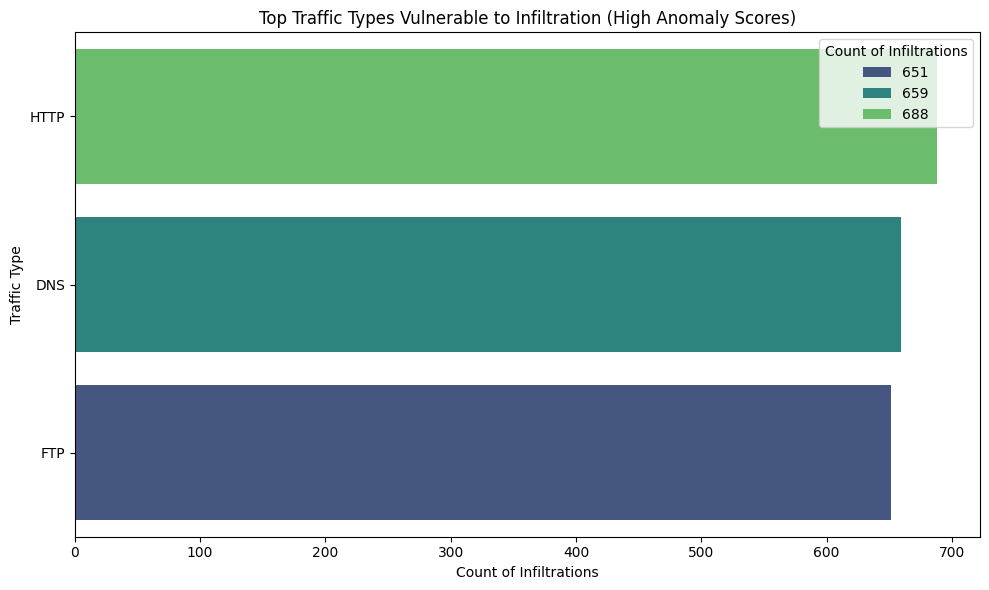

In [41]:
# Plotting the top traffic types vulnerable to infiltration
plt.figure(figsize=(10, 6))
sns.barplot(x='Count of Infiltrations', y='Traffic Type', hue='Count of Infiltrations', data=top_vulnerable_traffic, palette='viridis', dodge=False)
plt.xlabel('Count of Infiltrations')
plt.ylabel('Traffic Type')
plt.title('Top Traffic Types Vulnerable to Infiltration (High Anomaly Scores)')
plt.tight_layout()
plt.show()

In [42]:
# Filter data for cyber attacks based on relevant columns
cyber_attacks_data = df[df['Action Taken'].str.contains('Blocked', case=False, na=False)]

# Group by 'Device/OS' and count the number of occurrences
vulnerable_devices_os_counts = cyber_attacks_data['Device/OS'].value_counts()

# Convert the result to a DataFrame for better readability
vulnerable_devices_os_df = pd.DataFrame(vulnerable_devices_os_counts).reset_index()
vulnerable_devices_os_df.columns = ['Device/OS', 'Count of Cyber Attacks']

# Display the top 10 vulnerable devices/OS by number of cyber attacks
top_vulnerable_devices_os = vulnerable_devices_os_df.head(10)
print(top_vulnerable_devices_os)

   Device/OS  Count of Cyber Attacks
0    Windows                    6072
1      Linux                    2972
2  Macintosh                    1959
3       iPod                     914
4    Android                     559
5     iPhone                     544
6       iPad                     509


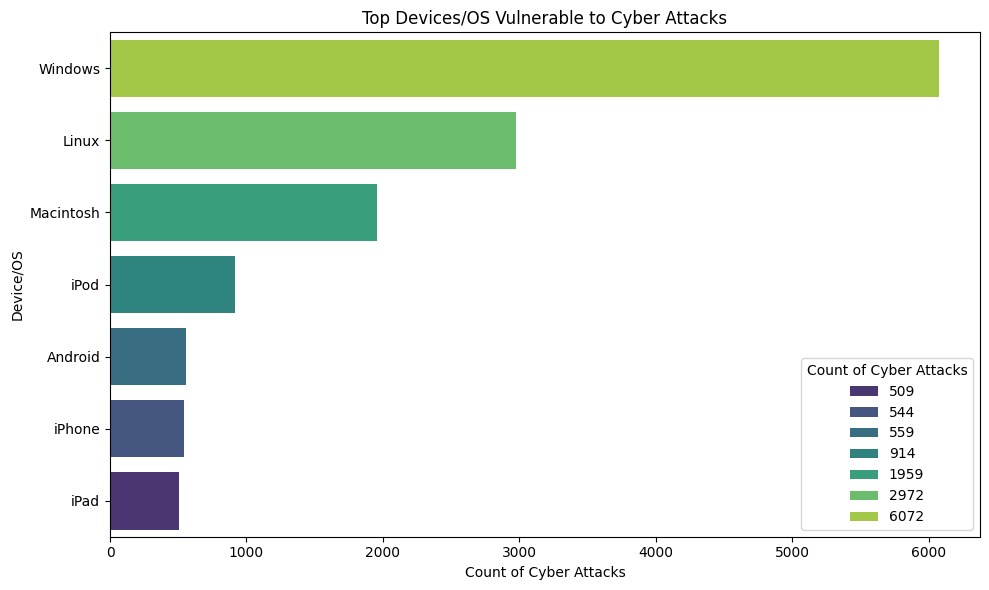

In [43]:
# Plotting the top devices/OS vulnerable to cyber attacks
plt.figure(figsize=(10, 6))
sns.barplot(x='Count of Cyber Attacks', y='Device/OS', hue='Count of Cyber Attacks', data=top_vulnerable_devices_os, palette='viridis', dodge=False)
plt.xlabel('Count of Cyber Attacks')
plt.ylabel('Device/OS')
plt.title('Top Devices/OS Vulnerable to Cyber Attacks')
plt.tight_layout()
plt.show()